## Import Dependencies

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/comment_toxicity/train.csv')

In [6]:
df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
10778,1c7e34da7a88ed60,I always thought that the shunt diodes were ne...,0,0,0,0,0,0
53848,8fd6da89a3e50586,I think that it would be best to do this merge...,0,0,0,0,0,0
126701,a5a0fe355818c140,Ok...so I think it's agreed that we should mak...,0,0,0,0,0,0
85731,e5503085f58bb0ae,"""\n\nI would suggest that your edit is based o...",0,0,0,0,0,0
111335,53b41e1d00846ad8,PPS You know? THEY can t NEVER stop IT. ff JaHn,0,0,0,0,0,0


In [7]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

## Data Preprocessing

In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
X.shape, y.shape

((159571,), (159571, 6))

In [12]:
MAX_FEATURES = 200000  #number of words in the vocab

vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length = 1800,
                               output_mode = 'int')

In [13]:
vectorizer.adapt(X.values)

In [14]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [15]:
vectorized_text = vectorizer(X.values)

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

## Create TensorFlow Data pipeline

In [17]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #prevents bottleneck

In [18]:
dataset.as_numpy_iterator().next()

(array([[  573,    43,    58, ...,     0,     0,     0],
        [45320, 65125,    73, ...,     0,     0,     0],
        [   15,   966,   187, ...,     0,     0,     0],
        ...,
        [ 8984,  5488,   307, ...,     0,     0,     0],
        [18076,   384,    14, ...,     0,     0,     0],
        [  148,     3,    10, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [19]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [20]:
batch_X.shape, batch_y.shape

((16, 1800), (16, 6))

In [21]:
batch_X

array([[ 865, 1102,  191, ...,    0,    0,    0],
       [2309,   70,   66, ...,    0,    0,    0],
       [   8,   69,   14, ...,    0,    0,    0],
       ...,
       [  73,   33,    8, ...,    0,    0,    0],
       [  24, 1582,   61, ...,    0,    0,    0],
       [ 136,   58, 1490, ...,    0,    0,    0]])

In [22]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## Split the dataset

In [23]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [24]:
len(train), len(val), len(test) #length of batches

(6981, 1994, 997)

In [26]:
train_generator = train.as_numpy_iterator()

In [27]:
train_generator.next()

(array([[  451, 20849, 22336, ...,     0,     0,     0],
        [ 1006,     4,   341, ...,     0,     0,     0],
        [   12,   708,  3616, ...,     0,     0,     0],
        ...,
        [    2,   145,     4, ...,     0,     0,     0],
        [   12,   524,    51, ...,     0,     0,     0],
        [    7,    19,    58, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

## Model building

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [32]:
model = Sequential()

model.add(Embedding(MAX_FEATURES+1, 32)) # embedding layer

model.add(Bidirectional(LSTM(32, activation = 'tanh'))) # bi-directional LSTM

#feature extractor fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

model.add(Dense(6, activation = 'sigmoid')) #6 different binary classifier at a time

In [30]:
y.shape

(159571, 6)

In [31]:
y[0]

array([0, 0, 0, 0, 0, 0])

In [33]:
model.compile(loss = 'BinaryCrossentropy', optimizer = 'Adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

## Training the model

In [36]:
history = model.fit(train, epochs = 5, validation_data = val)

Epoch 1/5
6981/6981 [==============================] - 796s 114ms/step - loss: 0.0590 - val_loss: 0.0440
Epoch 2/5
6981/6981 [==============================] - 643s 92ms/step - loss: 0.0452 - val_loss: 0.0394
Epoch 3/5
6981/6981 [==============================] - 627s 90ms/step - loss: 0.0401 - val_loss: 0.0354
Epoch 4/5
6981/6981 [==============================] - 623s 89ms/step - loss: 0.0361 - val_loss: 0.0322
Epoch 5/5
6981/6981 [==============================] - 625s 89ms/step - loss: 0.0313 - val_loss: 0.0274


In [37]:
history.history

{'loss': [0.059033703058958054,
  0.04519050940871239,
  0.040063124150037766,
  0.036052167415618896,
  0.0313284806907177],
 'val_loss': [0.04397514835000038,
  0.0394165925681591,
  0.03540882468223572,
  0.03219223767518997,
  0.0273914635181427]}

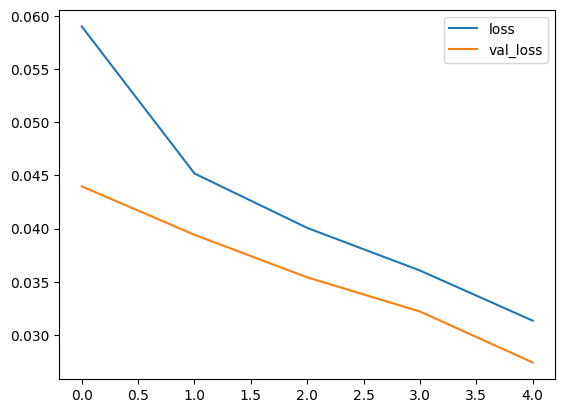

In [39]:
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

## Predictions

In [56]:
input_text = vectorizer('i am going to kill you!')

In [57]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  8,  74, 164, ...,   0,   0,   0])>

In [58]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 53ms/step


In [59]:
res

array([[0.8106093 , 0.08646213, 0.09894218, 0.267904  , 0.14846589,
        0.2590564 ]], dtype=float32)

In [60]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [41]:
batch = test.as_numpy_iterator().next()

In [61]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [62]:
model.predict(batch_X) > 0.5

1/1 [==============================] - 0s 64ms/step


array([[False, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [63]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 76ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [64]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## Evaluation metrics

In [66]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
  X_true, y_true = batch

  #prediction
  yhat = model.predict(X_true)

  #flatten the prediction
  y_true = y_true.flatten()
  yhat  = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 66ms/step


In [71]:
print(f'Precision:{pre.result().numpy()},\nRecall:{re.result().numpy()},\nAccuracy:{acc.result().numpy()}')

Precision:0.8742268085479736,
Recall:0.8288187384605408,
Accuracy:0.5145436525344849


## Building a Gradio App

In [ ]:
# !pip install gradio jinja2

In [73]:
import gradio as gr

In [74]:
model.save('/content/drive/MyDrive/comment_toxicity/toxicity.h5')

In [75]:
def comment_score(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

  return text

In [76]:
interface = gr.Interface(fn = comment_score,
                         inputs = gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

<ipython-input-76-8fbfc13fb0ad>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
<ipython-input-76-8fbfc13fb0ad>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
<ipython-input-76-8fbfc13fb0ad>:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Textbox(lines=2, placeholder='Comment to score'),


In [77]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://812411ad72d7b50030.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
